In [2]:
%load_ext autoreload
%autoreload 2

# LSTM + Attention Experiment

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader
from torch_geometric.data import Batch

In [4]:
train_npz = np.load('../../train.npz')
train_data = train_npz['data']
test_npz  = np.load('../../test_input.npz')
test_data  = test_npz['data']

In [5]:
print(train_data.shape, test_data.shape)

# Split once for later use
X_train = train_data[..., :50, :].copy()
Y_train = train_data[:, 0, 50:, :2].copy()

(10000, 50, 110, 6) (2100, 50, 50, 6)


In [6]:
import sys
sys.path.append('..')
from TrajectoryDataset import TrajectoryDatasetTrain, TrajectoryDatasetTest
from utils import train_model

sys.path.append('../..')
from models.lstm_attention import LSTMAttentionModel

In [7]:
torch.manual_seed(251)
np.random.seed(42)

scale = 5.0

N = len(train_data)
val_size = int(0.05 * N)
train_size = N - val_size

train_dataset = TrajectoryDatasetTrain(train_data[:train_size], scale=scale, augment=True)
val_dataset = TrajectoryDatasetTrain(train_data[train_size:], scale=scale, augment=False)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=lambda x: Batch.from_data_list(x))
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=lambda x: Batch.from_data_list(x))

# Set device for training speedup
if torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using Apple Silicon GPU")
elif torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using CUDA GPU")
else:
    device = torch.device('cpu')

Using Apple Silicon GPU


#### Your Optimizer and Hyperparameters for Question 2 Problem A (Try to use different optimizers and hyperparameters for your model and see how it affects the performance of your model)

In [31]:
model = LSTMAttentionModel()

optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.75, patience=4)
early_stopping_patience = 30 
criterion = nn.MSELoss()

In [ ]:
model = model.to(device)
train_model(
    model, 
    train_dataloader, 
    val_dataloader, 
    device, 
    optimizer, 
    criterion, 
    scheduler, 
    early_stopping_patience,
    "lstm_attention_weights"
)

Epoch:   1%|          | 1/100 [00:28<47:30, 28.79s/epoch]

Epoch 000 | Learning rate 0.001000 | train normalized MSE   3.5416 | val normalized MSE   1.2108, | val unnormalized MAE   3.3539 | val unnormalized MSE  30.2694


Epoch:   2%|▏         | 2/100 [00:59<48:24, 29.63s/epoch]

Epoch 001 | Learning rate 0.001000 | train normalized MSE   0.8907 | val normalized MSE   0.8217, | val unnormalized MAE   2.5884 | val unnormalized MSE  20.5415


Epoch:   3%|▎         | 3/100 [01:27<47:09, 29.16s/epoch]

Epoch 002 | Learning rate 0.001000 | train normalized MSE   0.6811 | val normalized MSE   0.8545, | val unnormalized MAE   2.6081 | val unnormalized MSE  21.3620


Epoch:   4%|▍         | 4/100 [01:56<46:20, 28.96s/epoch]

Epoch 003 | Learning rate 0.001000 | train normalized MSE   0.6231 | val normalized MSE   0.6861, | val unnormalized MAE   2.2874 | val unnormalized MSE  17.1524


Epoch:   5%|▌         | 5/100 [02:24<45:38, 28.83s/epoch]

Epoch 004 | Learning rate 0.001000 | train normalized MSE   0.5608 | val normalized MSE   0.6076, | val unnormalized MAE   2.1683 | val unnormalized MSE  15.1891


Epoch:   6%|▌         | 6/100 [02:53<44:57, 28.69s/epoch]

Epoch 005 | Learning rate 0.001000 | train normalized MSE   0.5490 | val normalized MSE   0.5382, | val unnormalized MAE   1.9095 | val unnormalized MSE  13.4541


Epoch:   7%|▋         | 7/100 [03:21<44:20, 28.61s/epoch]

Epoch 006 | Learning rate 0.001000 | train normalized MSE   0.5319 | val normalized MSE   0.5479, | val unnormalized MAE   1.9150 | val unnormalized MSE  13.6974


Epoch:   8%|▊         | 8/100 [03:51<44:12, 28.83s/epoch]

Epoch 007 | Learning rate 0.001000 | train normalized MSE   0.4987 | val normalized MSE   0.4796, | val unnormalized MAE   1.8106 | val unnormalized MSE  11.9907


Epoch:   9%|▉         | 9/100 [04:20<43:55, 28.96s/epoch]

Epoch 008 | Learning rate 0.001000 | train normalized MSE   0.4690 | val normalized MSE   0.4992, | val unnormalized MAE   1.8342 | val unnormalized MSE  12.4804


Epoch:  10%|█         | 10/100 [04:48<42:53, 28.60s/epoch]

Epoch 009 | Learning rate 0.001000 | train normalized MSE   0.4700 | val normalized MSE   0.4884, | val unnormalized MAE   1.8669 | val unnormalized MSE  12.2109


Epoch:  11%|█         | 11/100 [05:16<42:08, 28.41s/epoch]

Epoch 010 | Learning rate 0.001000 | train normalized MSE   0.4602 | val normalized MSE   0.4436, | val unnormalized MAE   1.7105 | val unnormalized MSE  11.0892


Epoch:  12%|█▏        | 12/100 [05:45<42:01, 28.65s/epoch]

Epoch 011 | Learning rate 0.001000 | train normalized MSE   0.4496 | val normalized MSE   0.5370, | val unnormalized MAE   2.0258 | val unnormalized MSE  13.4261


Epoch:  13%|█▎        | 13/100 [06:13<41:19, 28.50s/epoch]

Epoch 012 | Learning rate 0.001000 | train normalized MSE   0.4465 | val normalized MSE   0.4372, | val unnormalized MAE   1.7355 | val unnormalized MSE  10.9288


Epoch:  14%|█▍        | 14/100 [06:41<40:37, 28.34s/epoch]

Epoch 013 | Learning rate 0.001000 | train normalized MSE   0.4298 | val normalized MSE   0.4379, | val unnormalized MAE   1.7233 | val unnormalized MSE  10.9471


Epoch:  15%|█▌        | 15/100 [07:09<40:13, 28.39s/epoch]

Epoch 014 | Learning rate 0.001000 | train normalized MSE   0.4220 | val normalized MSE   0.4373, | val unnormalized MAE   1.6604 | val unnormalized MSE  10.9326


Epoch:  16%|█▌        | 16/100 [07:38<39:50, 28.45s/epoch]

Epoch 015 | Learning rate 0.001000 | train normalized MSE   0.4068 | val normalized MSE   0.4946, | val unnormalized MAE   1.8691 | val unnormalized MSE  12.3642


Epoch:  17%|█▋        | 17/100 [08:06<39:03, 28.23s/epoch]

Epoch 016 | Learning rate 0.001000 | train normalized MSE   0.4164 | val normalized MSE   0.4102, | val unnormalized MAE   1.6511 | val unnormalized MSE  10.2560


Epoch:  18%|█▊        | 18/100 [08:35<38:51, 28.43s/epoch]

Epoch 017 | Learning rate 0.001000 | train normalized MSE   0.4000 | val normalized MSE   0.4360, | val unnormalized MAE   1.7303 | val unnormalized MSE  10.8991


Epoch:  19%|█▉        | 19/100 [09:02<38:09, 28.27s/epoch]

Epoch 018 | Learning rate 0.001000 | train normalized MSE   0.4008 | val normalized MSE   0.4025, | val unnormalized MAE   1.6429 | val unnormalized MSE  10.0629


Epoch:  20%|██        | 20/100 [09:31<37:57, 28.47s/epoch]

Epoch 019 | Learning rate 0.001000 | train normalized MSE   0.3876 | val normalized MSE   0.4284, | val unnormalized MAE   1.6786 | val unnormalized MSE  10.7090


Epoch:  21%|██        | 21/100 [14:04<2:14:04, 101.83s/epoch]

Epoch 020 | Learning rate 0.001000 | train normalized MSE   0.3859 | val normalized MSE   0.3832, | val unnormalized MAE   1.6051 | val unnormalized MSE   9.5799


Epoch:  22%|██▏       | 22/100 [15:06<1:56:32, 89.64s/epoch] 

Epoch 021 | Learning rate 0.001000 | train normalized MSE   0.3706 | val normalized MSE   0.4045, | val unnormalized MAE   1.6237 | val unnormalized MSE  10.1135


Epoch:  23%|██▎       | 23/100 [15:34<1:31:18, 71.15s/epoch]

Epoch 022 | Learning rate 0.001000 | train normalized MSE   0.3714 | val normalized MSE   0.3917, | val unnormalized MAE   1.5778 | val unnormalized MSE   9.7937


Epoch:  24%|██▍       | 24/100 [31:31<7:07:05, 337.17s/epoch]

Epoch 023 | Learning rate 0.001000 | train normalized MSE   0.3692 | val normalized MSE   0.3865, | val unnormalized MAE   1.6187 | val unnormalized MSE   9.6613


Epoch:  25%|██▌       | 25/100 [32:00<5:05:54, 244.72s/epoch]

Epoch 024 | Learning rate 0.001000 | train normalized MSE   0.3606 | val normalized MSE   0.3604, | val unnormalized MAE   1.5768 | val unnormalized MSE   9.0093


Epoch:  26%|██▌       | 26/100 [32:30<3:42:06, 180.09s/epoch]

Epoch 025 | Learning rate 0.001000 | train normalized MSE   0.3683 | val normalized MSE   0.3676, | val unnormalized MAE   1.5654 | val unnormalized MSE   9.1894


Epoch:  27%|██▋       | 27/100 [32:58<2:43:40, 134.53s/epoch]

Epoch 026 | Learning rate 0.001000 | train normalized MSE   0.3557 | val normalized MSE   0.3662, | val unnormalized MAE   1.5608 | val unnormalized MSE   9.1538


Epoch:  28%|██▊       | 28/100 [33:26<2:03:17, 102.74s/epoch]

Epoch 027 | Learning rate 0.001000 | train normalized MSE   0.3516 | val normalized MSE   0.3677, | val unnormalized MAE   1.5577 | val unnormalized MSE   9.1916


Epoch:  29%|██▉       | 29/100 [33:54<1:34:59, 80.27s/epoch] 

Epoch 028 | Learning rate 0.001000 | train normalized MSE   0.3460 | val normalized MSE   0.3410, | val unnormalized MAE   1.4623 | val unnormalized MSE   8.5251


Epoch:  30%|███       | 30/100 [34:24<1:15:53, 65.05s/epoch]

Epoch 029 | Learning rate 0.001000 | train normalized MSE   0.3452 | val normalized MSE   0.3664, | val unnormalized MAE   1.5800 | val unnormalized MSE   9.1608


Epoch:  31%|███       | 31/100 [34:52<1:01:56, 53.86s/epoch]

Epoch 030 | Learning rate 0.001000 | train normalized MSE   0.3438 | val normalized MSE   0.3381, | val unnormalized MAE   1.4893 | val unnormalized MSE   8.4530


Epoch:  32%|███▏      | 32/100 [35:19<52:04, 45.95s/epoch]  

Epoch 031 | Learning rate 0.001000 | train normalized MSE   0.3407 | val normalized MSE   0.3403, | val unnormalized MAE   1.5055 | val unnormalized MSE   8.5068


Epoch:  33%|███▎      | 33/100 [35:47<45:15, 40.54s/epoch]

Epoch 032 | Learning rate 0.001000 | train normalized MSE   0.3366 | val normalized MSE   0.3295, | val unnormalized MAE   1.4455 | val unnormalized MSE   8.2387


Epoch:  34%|███▍      | 34/100 [36:16<40:44, 37.04s/epoch]

Epoch 033 | Learning rate 0.001000 | train normalized MSE   0.3294 | val normalized MSE   0.3497, | val unnormalized MAE   1.5075 | val unnormalized MSE   8.7420


Epoch:  35%|███▌      | 35/100 [36:46<37:55, 35.00s/epoch]

Epoch 034 | Learning rate 0.001000 | train normalized MSE   0.3264 | val normalized MSE   0.3587, | val unnormalized MAE   1.5452 | val unnormalized MSE   8.9665


Epoch:  36%|███▌      | 36/100 [37:14<35:09, 32.95s/epoch]

Epoch 035 | Learning rate 0.001000 | train normalized MSE   0.3210 | val normalized MSE   0.3444, | val unnormalized MAE   1.5192 | val unnormalized MSE   8.6088


Epoch:  37%|███▋      | 37/100 [37:43<33:15, 31.68s/epoch]

Epoch 036 | Learning rate 0.001000 | train normalized MSE   0.3177 | val normalized MSE   0.3611, | val unnormalized MAE   1.5379 | val unnormalized MSE   9.0269


Epoch:  38%|███▊      | 38/100 [38:13<32:06, 31.07s/epoch]

Epoch 037 | Learning rate 0.000750 | train normalized MSE   0.3196 | val normalized MSE   0.3517, | val unnormalized MAE   1.4950 | val unnormalized MSE   8.7922


Epoch:  39%|███▉      | 39/100 [38:40<30:29, 29.99s/epoch]

Epoch 038 | Learning rate 0.000750 | train normalized MSE   0.3064 | val normalized MSE   0.3112, | val unnormalized MAE   1.4180 | val unnormalized MSE   7.7801


Epoch:  40%|████      | 40/100 [39:07<29:08, 29.15s/epoch]

Epoch 039 | Learning rate 0.000750 | train normalized MSE   0.2997 | val normalized MSE   0.3336, | val unnormalized MAE   1.4701 | val unnormalized MSE   8.3402


Epoch:  41%|████      | 41/100 [39:34<27:57, 28.44s/epoch]

Epoch 040 | Learning rate 0.000750 | train normalized MSE   0.2954 | val normalized MSE   0.3305, | val unnormalized MAE   1.4674 | val unnormalized MSE   8.2626


Epoch:  42%|████▏     | 42/100 [40:02<27:16, 28.22s/epoch]

Epoch 041 | Learning rate 0.000750 | train normalized MSE   0.2979 | val normalized MSE   0.3102, | val unnormalized MAE   1.4208 | val unnormalized MSE   7.7561


Epoch:  43%|████▎     | 43/100 [40:30<26:46, 28.18s/epoch]

Epoch 042 | Learning rate 0.000750 | train normalized MSE   0.2942 | val normalized MSE   0.3193, | val unnormalized MAE   1.4038 | val unnormalized MSE   7.9833


Epoch:  44%|████▍     | 44/100 [40:56<25:50, 27.69s/epoch]

Epoch 043 | Learning rate 0.000750 | train normalized MSE   0.2970 | val normalized MSE   0.3218, | val unnormalized MAE   1.4046 | val unnormalized MSE   8.0440


Epoch:  45%|████▌     | 45/100 [41:23<25:08, 27.43s/epoch]

Epoch 044 | Learning rate 0.000750 | train normalized MSE   0.2881 | val normalized MSE   0.3270, | val unnormalized MAE   1.4418 | val unnormalized MSE   8.1754


Epoch:  46%|████▌     | 46/100 [41:51<24:38, 27.39s/epoch]

Epoch 045 | Learning rate 0.000750 | train normalized MSE   0.2915 | val normalized MSE   0.3086, | val unnormalized MAE   1.3944 | val unnormalized MSE   7.7152


Epoch:  47%|████▋     | 47/100 [42:17<23:59, 27.15s/epoch]

Epoch 046 | Learning rate 0.000750 | train normalized MSE   0.2910 | val normalized MSE   0.3431, | val unnormalized MAE   1.4952 | val unnormalized MSE   8.5764


Epoch:  48%|████▊     | 48/100 [42:44<23:27, 27.06s/epoch]

Epoch 047 | Learning rate 0.000750 | train normalized MSE   0.2882 | val normalized MSE   0.3012, | val unnormalized MAE   1.3765 | val unnormalized MSE   7.5311


Epoch:  49%|████▉     | 49/100 [43:11<22:58, 27.04s/epoch]

Epoch 048 | Learning rate 0.000750 | train normalized MSE   0.2929 | val normalized MSE   0.3271, | val unnormalized MAE   1.4175 | val unnormalized MSE   8.1786


Epoch:  50%|█████     | 50/100 [43:38<22:30, 27.01s/epoch]

Epoch 049 | Learning rate 0.000750 | train normalized MSE   0.2870 | val normalized MSE   0.3247, | val unnormalized MAE   1.3925 | val unnormalized MSE   8.1184


Epoch:  51%|█████     | 51/100 [44:05<22:02, 26.99s/epoch]

Epoch 050 | Learning rate 0.000750 | train normalized MSE   0.2856 | val normalized MSE   0.3013, | val unnormalized MAE   1.4116 | val unnormalized MSE   7.5318


Epoch:  52%|█████▏    | 52/100 [44:32<21:44, 27.17s/epoch]

Epoch 051 | Learning rate 0.000750 | train normalized MSE   0.2824 | val normalized MSE   0.3124, | val unnormalized MAE   1.3984 | val unnormalized MSE   7.8096


Epoch:  53%|█████▎    | 53/100 [44:59<21:13, 27.10s/epoch]

Epoch 052 | Learning rate 0.000563 | train normalized MSE   0.2867 | val normalized MSE   0.3188, | val unnormalized MAE   1.4415 | val unnormalized MSE   7.9705


Epoch:  54%|█████▍    | 54/100 [45:26<20:46, 27.10s/epoch]

Epoch 053 | Learning rate 0.000563 | train normalized MSE   0.2723 | val normalized MSE   0.3092, | val unnormalized MAE   1.4014 | val unnormalized MSE   7.7306


Epoch:  55%|█████▌    | 55/100 [45:54<20:20, 27.13s/epoch]

Epoch 054 | Learning rate 0.000563 | train normalized MSE   0.2671 | val normalized MSE   0.3160, | val unnormalized MAE   1.4146 | val unnormalized MSE   7.8990


Epoch:  56%|█████▌    | 56/100 [46:21<19:54, 27.16s/epoch]

Epoch 055 | Learning rate 0.000563 | train normalized MSE   0.2679 | val normalized MSE   0.3026, | val unnormalized MAE   1.3686 | val unnormalized MSE   7.5657


Epoch:  57%|█████▋    | 57/100 [46:49<19:36, 27.36s/epoch]

Epoch 056 | Learning rate 0.000563 | train normalized MSE   0.2636 | val normalized MSE   0.3149, | val unnormalized MAE   1.3899 | val unnormalized MSE   7.8723


Epoch:  58%|█████▊    | 58/100 [47:16<19:03, 27.23s/epoch]

Epoch 057 | Learning rate 0.000563 | train normalized MSE   0.2620 | val normalized MSE   0.3001, | val unnormalized MAE   1.3823 | val unnormalized MSE   7.5028


Epoch:  59%|█████▉    | 59/100 [47:42<18:30, 27.09s/epoch]

Epoch 058 | Learning rate 0.000563 | train normalized MSE   0.2641 | val normalized MSE   0.3073, | val unnormalized MAE   1.4153 | val unnormalized MSE   7.6824


Epoch:  60%|██████    | 60/100 [48:09<18:00, 27.00s/epoch]

Epoch 059 | Learning rate 0.000563 | train normalized MSE   0.2602 | val normalized MSE   0.2931, | val unnormalized MAE   1.3398 | val unnormalized MSE   7.3286


Epoch:  61%|██████    | 61/100 [48:36<17:35, 27.05s/epoch]

Epoch 060 | Learning rate 0.000563 | train normalized MSE   0.2634 | val normalized MSE   0.3144, | val unnormalized MAE   1.3974 | val unnormalized MSE   7.8605


Epoch:  62%|██████▏   | 62/100 [49:03<17:02, 26.91s/epoch]

Epoch 061 | Learning rate 0.000563 | train normalized MSE   0.2600 | val normalized MSE   0.2973, | val unnormalized MAE   1.3821 | val unnormalized MSE   7.4321


Epoch:  63%|██████▎   | 63/100 [49:30<16:34, 26.87s/epoch]

Epoch 062 | Learning rate 0.000563 | train normalized MSE   0.2588 | val normalized MSE   0.3019, | val unnormalized MAE   1.3937 | val unnormalized MSE   7.5475


Epoch:  64%|██████▍   | 64/100 [49:57<16:13, 27.05s/epoch]

Epoch 063 | Learning rate 0.000563 | train normalized MSE   0.2566 | val normalized MSE   0.2868, | val unnormalized MAE   1.3071 | val unnormalized MSE   7.1707


Epoch:  65%|██████▌   | 65/100 [50:24<15:46, 27.04s/epoch]

Epoch 064 | Learning rate 0.000563 | train normalized MSE   0.2547 | val normalized MSE   0.2952, | val unnormalized MAE   1.3687 | val unnormalized MSE   7.3812


Epoch:  66%|██████▌   | 66/100 [50:51<15:18, 27.01s/epoch]

Epoch 065 | Learning rate 0.000563 | train normalized MSE   0.2571 | val normalized MSE   0.3219, | val unnormalized MAE   1.4169 | val unnormalized MSE   8.0463


Epoch:  67%|██████▋   | 67/100 [51:18<14:52, 27.04s/epoch]

Epoch 066 | Learning rate 0.000563 | train normalized MSE   0.2537 | val normalized MSE   0.3017, | val unnormalized MAE   1.3367 | val unnormalized MSE   7.5419


Epoch:  68%|██████▊   | 68/100 [51:45<14:21, 26.91s/epoch]

Epoch 067 | Learning rate 0.000563 | train normalized MSE   0.2541 | val normalized MSE   0.3247, | val unnormalized MAE   1.4043 | val unnormalized MSE   8.1179


Epoch:  69%|██████▉   | 69/100 [52:12<13:55, 26.95s/epoch]

Epoch 068 | Learning rate 0.000563 | train normalized MSE   0.2546 | val normalized MSE   0.2868, | val unnormalized MAE   1.3033 | val unnormalized MSE   7.1693


Epoch:  70%|███████   | 70/100 [52:39<13:33, 27.10s/epoch]

Epoch 069 | Learning rate 0.000563 | train normalized MSE   0.2532 | val normalized MSE   0.3075, | val unnormalized MAE   1.3675 | val unnormalized MSE   7.6869


Epoch:  71%|███████   | 71/100 [53:07<13:09, 27.21s/epoch]

Epoch 070 | Learning rate 0.000563 | train normalized MSE   0.2495 | val normalized MSE   0.3189, | val unnormalized MAE   1.4056 | val unnormalized MSE   7.9736


Epoch:  72%|███████▏  | 72/100 [53:34<12:42, 27.22s/epoch]

Epoch 071 | Learning rate 0.000563 | train normalized MSE   0.3106 | val normalized MSE   0.7738, | val unnormalized MAE   1.9265 | val unnormalized MSE  19.3451


Epoch:  73%|███████▎  | 73/100 [54:02<12:16, 27.29s/epoch]

Epoch 072 | Learning rate 0.000563 | train normalized MSE   0.2662 | val normalized MSE   0.2937, | val unnormalized MAE   1.3413 | val unnormalized MSE   7.3433


Epoch:  74%|███████▍  | 74/100 [54:29<11:50, 27.31s/epoch]

Epoch 073 | Learning rate 0.000422 | train normalized MSE   0.2505 | val normalized MSE   0.3042, | val unnormalized MAE   1.3458 | val unnormalized MSE   7.6048


Epoch:  75%|███████▌  | 75/100 [54:56<11:18, 27.16s/epoch]

Epoch 074 | Learning rate 0.000422 | train normalized MSE   0.2422 | val normalized MSE   0.2905, | val unnormalized MAE   1.3091 | val unnormalized MSE   7.2626


Epoch:  76%|███████▌  | 76/100 [55:23<10:49, 27.06s/epoch]

Epoch 075 | Learning rate 0.000422 | train normalized MSE   0.2377 | val normalized MSE   0.2881, | val unnormalized MAE   1.3218 | val unnormalized MSE   7.2021


Epoch:  77%|███████▋  | 77/100 [55:51<10:28, 27.34s/epoch]

Epoch 076 | Learning rate 0.000422 | train normalized MSE   0.2373 | val normalized MSE   0.2862, | val unnormalized MAE   1.3170 | val unnormalized MSE   7.1549


Epoch:  78%|███████▊  | 78/100 [56:18<10:01, 27.36s/epoch]

Epoch 077 | Learning rate 0.000422 | train normalized MSE   0.2410 | val normalized MSE   0.2792, | val unnormalized MAE   1.2872 | val unnormalized MSE   6.9794


Epoch:  79%|███████▉  | 79/100 [56:46<09:37, 27.49s/epoch]

Epoch 078 | Learning rate 0.000422 | train normalized MSE   0.2348 | val normalized MSE   0.2707, | val unnormalized MAE   1.2942 | val unnormalized MSE   6.7683


Epoch:  80%|████████  | 80/100 [57:12<09:04, 27.25s/epoch]

Epoch 079 | Learning rate 0.000422 | train normalized MSE   0.2357 | val normalized MSE   0.2740, | val unnormalized MAE   1.2939 | val unnormalized MSE   6.8504


Epoch:  81%|████████  | 81/100 [57:38<08:29, 26.81s/epoch]

Epoch 080 | Learning rate 0.000422 | train normalized MSE   0.2353 | val normalized MSE   0.2697, | val unnormalized MAE   1.2836 | val unnormalized MSE   6.7430


Epoch:  82%|████████▏ | 82/100 [58:04<07:57, 26.54s/epoch]

Epoch 081 | Learning rate 0.000422 | train normalized MSE   0.2389 | val normalized MSE   0.2891, | val unnormalized MAE   1.3372 | val unnormalized MSE   7.2272


Epoch:  83%|████████▎ | 83/100 [58:31<07:33, 26.69s/epoch]

Epoch 082 | Learning rate 0.000422 | train normalized MSE   0.2314 | val normalized MSE   0.2792, | val unnormalized MAE   1.2955 | val unnormalized MSE   6.9808


Epoch:  84%|████████▍ | 84/100 [58:58<07:06, 26.64s/epoch]

Epoch 083 | Learning rate 0.000422 | train normalized MSE   0.2350 | val normalized MSE   0.2973, | val unnormalized MAE   1.3194 | val unnormalized MSE   7.4336


Epoch:  85%|████████▌ | 85/100 [59:24<06:38, 26.54s/epoch]

Epoch 084 | Learning rate 0.000422 | train normalized MSE   0.2323 | val normalized MSE   0.2860, | val unnormalized MAE   1.3283 | val unnormalized MSE   7.1502


Epoch:  86%|████████▌ | 86/100 [59:50<06:10, 26.46s/epoch]

Epoch 085 | Learning rate 0.000316 | train normalized MSE   0.2322 | val normalized MSE   0.2891, | val unnormalized MAE   1.3352 | val unnormalized MSE   7.2279


Epoch:  87%|████████▋ | 87/100 [1:00:17<05:43, 26.43s/epoch]

Epoch 086 | Learning rate 0.000316 | train normalized MSE   0.2283 | val normalized MSE   0.2710, | val unnormalized MAE   1.2588 | val unnormalized MSE   6.7749


Epoch:  88%|████████▊ | 88/100 [1:00:43<05:16, 26.38s/epoch]

Epoch 087 | Learning rate 0.000316 | train normalized MSE   0.2223 | val normalized MSE   0.2778, | val unnormalized MAE   1.2671 | val unnormalized MSE   6.9453


Epoch:  89%|████████▉ | 89/100 [1:01:09<04:48, 26.19s/epoch]

Epoch 088 | Learning rate 0.000316 | train normalized MSE   0.2221 | val normalized MSE   0.2776, | val unnormalized MAE   1.3035 | val unnormalized MSE   6.9406


Epoch:  90%|█████████ | 90/100 [1:01:35<04:23, 26.32s/epoch]

Epoch 089 | Learning rate 0.000316 | train normalized MSE   0.2240 | val normalized MSE   0.2823, | val unnormalized MAE   1.2913 | val unnormalized MSE   7.0587


Epoch:  91%|█████████ | 91/100 [1:02:02<03:56, 26.32s/epoch]

Epoch 090 | Learning rate 0.000237 | train normalized MSE   0.2212 | val normalized MSE   0.2886, | val unnormalized MAE   1.2865 | val unnormalized MSE   7.2150


Epoch:  92%|█████████▏| 92/100 [1:02:28<03:31, 26.39s/epoch]

Epoch 091 | Learning rate 0.000237 | train normalized MSE   0.2178 | val normalized MSE   0.2793, | val unnormalized MAE   1.2902 | val unnormalized MSE   6.9814


Epoch:  93%|█████████▎| 93/100 [1:02:55<03:05, 26.43s/epoch]

Epoch 092 | Learning rate 0.000237 | train normalized MSE   0.2158 | val normalized MSE   0.2842, | val unnormalized MAE   1.2829 | val unnormalized MSE   7.1057


Epoch:  94%|█████████▍| 94/100 [1:03:21<02:38, 26.44s/epoch]

Epoch 093 | Learning rate 0.000237 | train normalized MSE   0.2144 | val normalized MSE   0.2810, | val unnormalized MAE   1.2779 | val unnormalized MSE   7.0248


Epoch:  95%|█████████▌| 95/100 [1:03:48<02:12, 26.50s/epoch]

Epoch 094 | Learning rate 0.000237 | train normalized MSE   0.2125 | val normalized MSE   0.2733, | val unnormalized MAE   1.2777 | val unnormalized MSE   6.8336


Epoch:  96%|█████████▌| 96/100 [1:04:14<01:45, 26.46s/epoch]

Epoch 095 | Learning rate 0.000237 | train normalized MSE   0.2106 | val normalized MSE   0.2696, | val unnormalized MAE   1.2762 | val unnormalized MSE   6.7394


Epoch:  97%|█████████▋| 97/100 [1:04:41<01:19, 26.58s/epoch]

Epoch 096 | Learning rate 0.000237 | train normalized MSE   0.2115 | val normalized MSE   0.2826, | val unnormalized MAE   1.2855 | val unnormalized MSE   7.0651


Epoch:  98%|█████████▊| 98/100 [1:05:08<00:53, 26.65s/epoch]

Epoch 097 | Learning rate 0.000237 | train normalized MSE   0.2125 | val normalized MSE   0.2895, | val unnormalized MAE   1.2935 | val unnormalized MSE   7.2382


Epoch:  99%|█████████▉| 99/100 [1:05:36<00:27, 27.26s/epoch]

Epoch 098 | Learning rate 0.000237 | train normalized MSE   0.2109 | val normalized MSE   0.2826, | val unnormalized MAE   1.2690 | val unnormalized MSE   7.0649


Epoch: 100%|██████████| 100/100 [1:06:04<00:00, 39.65s/epoch]

Epoch 099 | Learning rate 0.000237 | train normalized MSE   0.2130 | val normalized MSE   0.2930, | val unnormalized MAE   1.2992 | val unnormalized MSE   7.3255


In [8]:
test_dataset = TrajectoryDatasetTest(test_data, scale=scale)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,
                         collate_fn=lambda xs: Batch.from_data_list(xs))

lstm_attention_weights = torch.load("lstm_attention_weights.pt")
model = LSTMAttentionModel()
model.load_state_dict(lstm_attention_weights)
torch.save(model, "full_lstm_attention_model.pt")

In [15]:
# this runs on the test data to submit for the competition
test_dataset.generate_submission_predictions(model, device, output_file_name='lstm_attention_submission')

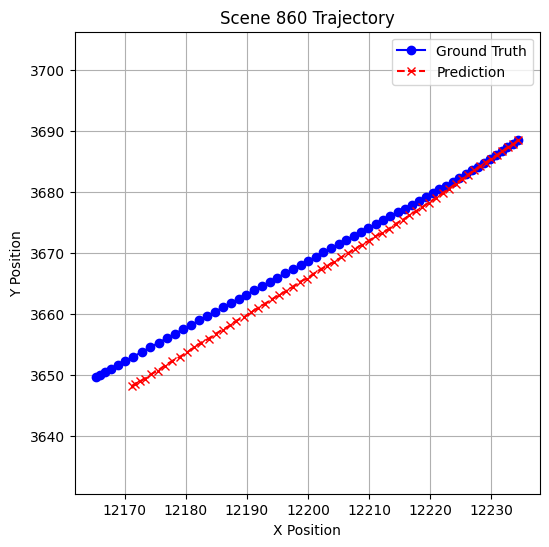

In [21]:
from utils import visualize_trajectory

# run this cell to visualize how the model's predicted trajectory compares to the real one on some data points
visualize_trajectory(train_dataset, model, np.random.randint(0, len(train_dataset)))